## Let's look at the myosin alignment between species

In [94]:
import os
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import pdb
import subprocess
import logomaker as lm
import matplotlib.pyplot as plt
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO
from enum import Enum

In [95]:
myosin_df = pd.read_csv('myosin2_comparisons.csv')
myosin_df

species_protein  uniprot_id  \
0                             human_myh2      Q9UKX2   
1                             mouse_myh2      I6L963   
2                white_wagtail_bird_myh2  A0A7K5BNU1   
3                     alligator_gar_myh2  A0A8J7P6N2   
4              crossleys_vanga_bird_myh2  A0A7L2SFS7   
5                         pygmy_owl_myh2  A0A7L0SDH5   
6   atlantic_yellow_nosed_albatross_myh2  A0A7L3JWA0   
7                        guinea_pig_myh2      H0V2N7   
8                sumatran_orangutan_myh2  A0A2J8TF51   
9                prairie_deer_mouse_myh2  A0A6I9L9A0   
10                       chimpanzee_myh2  A0A6D2XAS4   
11                 cape_golden_mole_myh2  A0A9B0WPU7   
12     lesser_egyptian_jerboa_mouse_myh2  A0A8C5P5R8   
13            eurasian_red_squirrel_myh2  A0A8D2CP65   
14                 little_brown_bat_myh2      G1PUN7   
15                  bengalese_finch_myh2  A0A218UI52   
16                       pike_perch_myh2  A0A8C9XWE7   
17                 japanese_lamprey_myh2      W0S4B4   
18                           turkey_myh2    pdb_6XE9   
19                           bovine_myh2      Q9BE41   
20      atlantic_bottlenose_dolphin_myh2  A0A6J3QLX0   
21                       blue_whale_myh2  A0A8C0E3K0   
22                            sheep_myh2      W5PT09   
23              wild_bactrian_camel_myh2  A0A8B8UKL6   
24                     olive_baboon_myh2  A0A096P2X3   
25              chacoan_peccary_pig_myh2  A0A8C3X2L6   
26                    hybrid_cattle_myh2  A0A4W2HXW2   
27                  domestic_ferret_myh2  A0A8U0MYI9   
28                           feline_myh2  A0A337SF79   
29                           canine_myh2      Q076A7   
30                              pig_myh2      Q9TV63   
31                            horse_myh2      Q8MJV1   
32                         chicken_myh11    pdb_8SYF   

                                             sequence  
0   MSSDSELAVFGEAAPFLRKSERERIEAQNRPFDAKTSVFVAEPKES...  
1   MSSDAEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
2   TYSGLFCVTVNPYKWLPVYDPQVVAAYRGKKRNEVPPHIFSISWSH...  
3   MSGDSEMSIFGEAAKYLRKSEKERLEAQSRAFDARTACFVDDDKEL...  
4   GLMDHKLVLHQLRCNGVLEGIRICRKGFPNKISYGDFKQRYHLLNA...  
5   MASPDAEMAAFGEAAPYLRKSEKERIEAQNKPFDAKSSVFVVHPKE...  
6   GAMEHELVLHQLRCNGVLEGIRICRKGFPNRVLYADFKQRYKVLNA...  
7   MSGADSEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKE...  
8   MSSDSELAVFGEAAPFLRKSERERIEAQNRPFDAKTSVFVVEPKES...  
9   MSSDAEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
10  MSSDSELAVFGEAAPFLRKSERERIEAQNRPFDAKTSVFVAEPKES...  
11  MSSDSEMAVFGEAAPFLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
12  MSSDSEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
13  MSSDSEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
14  MSSADQEMAAFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVVEPKE...  
15  MAVFGEAAPYLRKSEKERIAAQNKPFDAKSSVFVVHPKESFVKGTI...  
16  MSDAEMEIYGVAAPYLRKSERERIAAQNMPFDAKTAVFVPDPKQEY...  
17  MGDLHEFGKAAPFLRKSEKERLEAQTRPFDMKKECYVDDPKVEFVK...  
18  MSQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEA...  
19  MSSDQEMAIFGEAAPYLRKSEKERIEAQNKPFDAKTSVFVAEPKES...  
20  MSSDQEMAVFGEAAPYLRKSEKERIEAQNRPFDAKSSVFVVEPKES...  
21  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKISVFVAEPKEA...  
22  MSSDQEMAVFGEAAPYLRKSEKERIEAQNKPFDAKTSVFVAEPKES...  
23  MSSDQEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
24  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
25  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
26  MSSDQEMAIFGEAAPYLRKSEKERIEAQNKPFDAKTSVFVAEPKES...  
27  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVVDPKES...  
28  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
29  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
30  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
31  MSSDQEMAIFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...  
32  SQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAA...

In [96]:
# Download the muscle binary https://drive5.com/muscle/downloads_v3.htm
MUSCLE_ALIGN_CALL = (
    "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/muscle3.8.31_i86darwin64"
)

# Giving this a very very high penalty here for opening gaps!
def muscle_align(seqs, seq_record_name="_example.fasta", align_name="_align.fasta",gap_open_penalty = -10, gap_extension_penalty = -5, maxiters=10):
    SeqIO.write(
        [SeqRecord(Seq(seq), id=seq) for seq in seqs],
        seq_record_name,
        "fasta",
    )

    muscle_command = f"{MUSCLE_ALIGN_CALL} -in {seq_record_name} -out {align_name} -maxiters {maxiters} -gapopen {gap_open_penalty} -gapextend {gap_extension_penalty}"
    subprocess.call(
        muscle_command,
        shell=True,
    )
    with open(align_name, "r") as f:
        raw_lines = f.readlines()
    
    aligned_seqs = []
    aligned_protein_seq = ''
    for line in raw_lines:
        if ">" in line:
            # We are at the beginning of a new protein
            if aligned_protein_seq != '':
                aligned_seqs.append(aligned_protein_seq)
            aligned_protein_seq = ''
        elif "#" in line:
            continue
        else:
            aligned_protein_seq += line.strip()
    aligned_seqs.append(aligned_protein_seq)
    return aligned_seqs 


In [98]:
def save_web_logo_alignment(
    seqs,
    web_logo_name,
    axis,
    to_type="information",#"counts",
    title="",
):
    counts_mat = lm.alignment_to_matrix(seqs, to_type=to_type)

    if not counts_mat.empty:  # Check if counts_mat is not empty
        logo = lm.Logo(counts_mat, ax=axis, color_scheme="hydrophobicity")

        # axis.set_xlabel("Alignment Position")
        if to_type == "information":
            axis.set_ylabel("Information (Bits)")
        elif to_type == "counts":
            axis.set_ylabel("Residue Positional Counts")
        axis.set_title(title)

    # Save only if needed
    if web_logo_name and web_logo_name != "tmp":
        plt.savefig(web_logo_name)
    
    return counts_mat

In [99]:
aligned_seqs = muscle_align(list(myosin_df['sequence']))
counts_mat = lm.alignment_to_matrix(aligned_seqs, to_type='information')
print(len(aligned_seqs[0]))
aligned_seqs


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

_example 33 seqs, max length 1979, avg  length 1533
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:03     47 MB(0%)  Iter   1  100.00%  Align node       
00:00:03     47 MB(0%)  Iter   1  100.00%  Root alignment
00:00:04     48 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:04     48 MB(0%)  Iter   2  100.00%  Root alignment
00:00:04     48 MB(0%)  Iter   2  100.00%  Root alignment
00:00:09     48 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:14     48 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:14     48 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:14     48 MB(0%)  Iter   5  100.00%  Refine biparts


2033


['---MSQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVVNPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD-----------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKKDTSITQGPSFSYGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLL-EGFNNYTFLSNGHVPIPAQQDDEMFQETLEAMRIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNTAAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHPKFQKSKQLKDKTEFCILHYAGKVSYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSSSKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLLQVTRQEEEMQAKDEELQRTKERQQKAEAELKELEQKHTQLCEEKNLLQEKLQAETELYAEAEEMRVRLAAKKQELEEILHEMEARIEEEEERSQQLQAEKK


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

_example 32 seqs, max length 1979, avg  length 1555
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:02     46 MB(0%)  Iter   1  100.00%  Align node       
00:00:02     46 MB(0%)  Iter   1  100.00%  Root alignment
00:00:03     47 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:03     47 MB(0%)  Iter   2  100.00%  Root alignment
00:00:03     47 MB(0%)  Iter   2  100.00%  Root alignment
00:00:08     47 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:13     47 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:13     47 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:13     47 MB(0%)  Iter   5  100.00%  Refine biparts


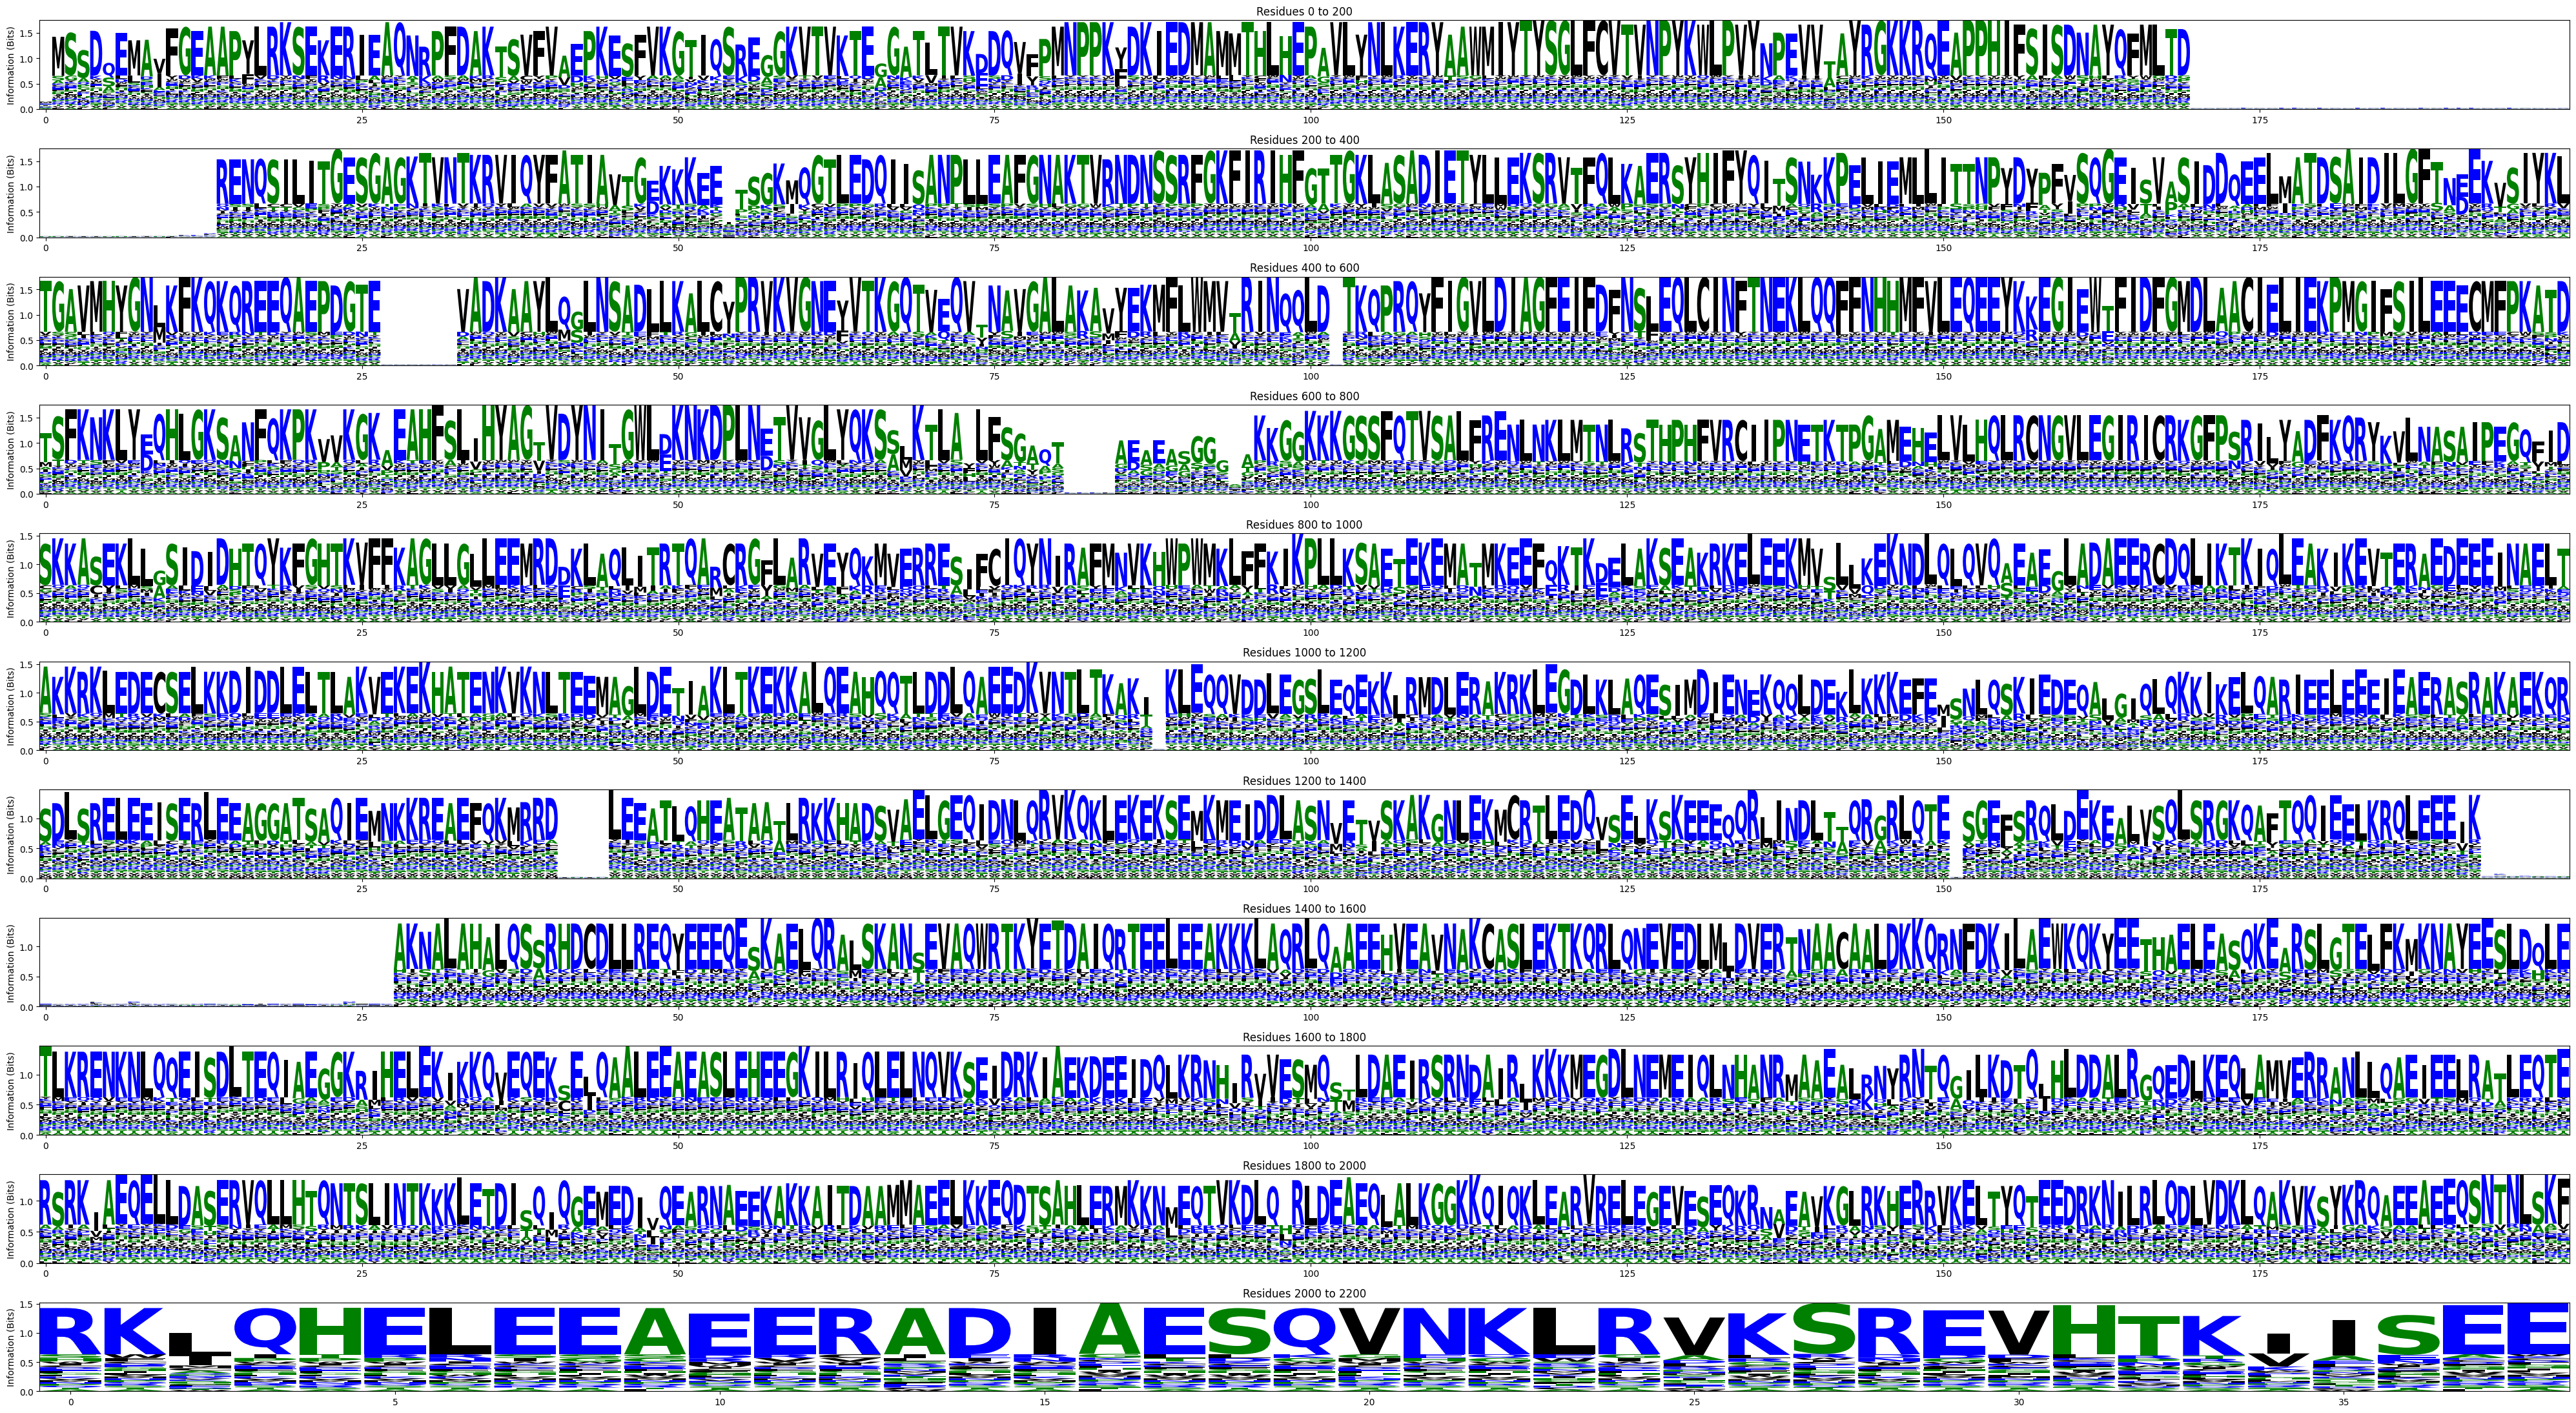

In [73]:
def plot_alignment_in_rows(
    seqs, 
    row_width,
    to_type="information", #"information",
):
    aligned_seqs = muscle_align(seqs)
    counts_mat = lm.alignment_to_matrix(aligned_seqs, to_type=to_type)

    num_rows = (len(aligned_seqs[0]) - 1) // row_width + 1
    fig, axes = plt.subplots(num_rows, 1, figsize=(40, 2 * num_rows))
    if num_rows == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        start = i * row_width
        end = start + row_width
        segment_seqs = [seq[start:end] for seq in aligned_seqs]
        save_web_logo_alignment(
            seqs=segment_seqs, 
            web_logo_name=None, 
            axis=ax, 
            title=f'Residues {row_width * (i)} to {row_width * (i+1)}',
            to_type=to_type,
        )

    plt.tight_layout()
    plt.show()
    return counts_mat

counts_mat = plot_alignment_in_rows(list(myosin_df['sequence']), row_width = 200)


# Let's try Myosin-11 from gallus gallus
https://www.rcsb.org/sequence/8SYF 

In [115]:
first_100_amino_acids = myosin_df[myosin_df['species_protein'] == 'chicken_myh11']['sequence'].to_list()[0][:150]
first_100_amino_acids
chicken_alignment = [seq for seq in aligned_seqs if first_100_amino_acids in seq][0]

homology_scores = counts_mat.max(axis=1)
chicken_scores = [(counts_mat.iloc[idx][char], char) for idx, char in enumerate(chicken_alignment) if char != '-']
print(chicken_scores)
chicken_alignment


[(0.08707189405293463, 'S'), (0.3335324889843512, 'Q'), (0.08707189405293467, 'K'), (0.07748031008320509, 'P'), (0.07806322525375108, 'L'), (0.05493997274525731, 'S'), (0.08774546879001925, 'D'), (0.0926768540738563, 'D'), (0.8874595941623329, 'E'), (0.09267685407385622, 'K'), (0.09267685407385622, 'F'), (0.08774546879001939, 'L'), (0.21146819265967953, 'F'), (0.09267685407385631, 'V'), (0.09267685407385648, 'D'), (1.0523383444975272, 'K'), (0.09267685407385648, 'N'), (0.09267685407385623, 'F'), (0.07748031008320508, 'V'), (0.09267685407385623, 'N'), (0.0926768540738564, 'N'), (0.08374421416829406, 'P'), (0.083744214168294, 'L'), (1.0523383444975256, 'A'), (1.0523383444975285, 'Q'), (0.08287352500778272, 'A'), (0.07038187268393557, 'D'), (0.0877454687900194, 'W'), (0.0926768540738563, 'S'), (0.09267685407385623, 'A'), (0.08774546879001924, 'K'), (0.9679494116427444, 'K'), (0.07094404110800662, 'L'), (0.0789339144142628, 'V'), (0.08374421416829425, 'W'), (0.08774546879001927, 'V'), (0.0

'----SQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVINPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD--------------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKK----DTSITGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLL-EGFNNYTFLSNGHVPIPAQQDDEMFQETLEAMTIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNTAAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHAKFQKSKQLKDKTEFCILHYAGKVTYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSASKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLL------------------------------------------------------------------------------------------------------

Text(0.5, 0, 'Residue #')

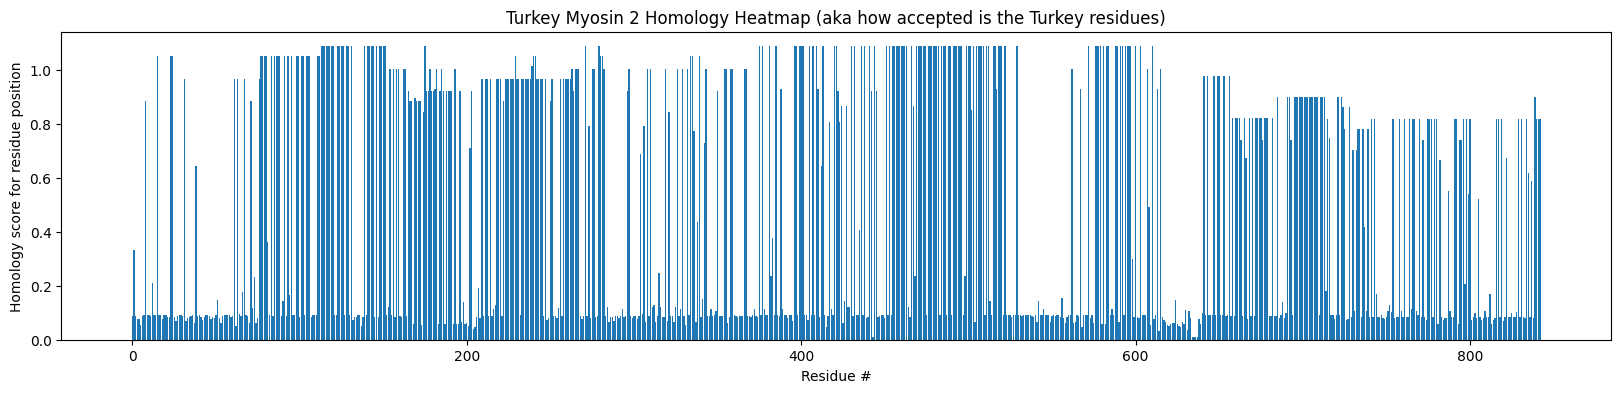

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4)) 
plt.bar(x=list(range(len(chicken_scores))), height=[score for score, char in chicken_scores])
plt.title("Chicken Myosin 11 Homology Heatmap (aka how accepted is the Turkey residues)")
plt.ylabel("Homology score for residue position")
plt.xlabel("Residue #")


In [118]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=list(range(len(chicken_scores))), y=[score for score, char in chicken_scores]))
fig.update_layout(
    title="Chicken Myosin 11 Homology Heatmap (aka how accepted is the Turkey residues)",
    xaxis_title="Residue #",
    yaxis_title="Homology score for residue position",
    autosize=False,
    width=2000,  # Adjust the width to your preference
    height=400   # Adjust the height to your preference
)

# Show the plot
fig.show()


# Okay let's paint the scores onto a turkey Myosin 2~!

Using this pdb structure of Turkey Myosin-2 https://www.rcsb.org/3d-view/6XE9 

In [76]:
myosin_df[myosin_df['species_protein'] == 'turkey']
aligned_seqs

['-MSQKPLSD--DEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVVNPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD-----------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKKDTSITQGPSFSYGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLLE-GFNNYTFLSNGHVPIPAQQDDEMFQETLEAMRIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNT------AAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHPKFQKSKQLKDKTEFCILHYAGKVSYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSSSKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLLQVTRQEEEMQAKDEELQRTKERQQKAEAELKELEQKHTQLCEEKNLLQEKLQAETELYAEAEEMRVRLAAKKQELEEILHEMEARIEEEEERSQQ

In [114]:
PDB_ID = '6XE9'

# Not valid since the muscle call seems to shuffle up the order of sequences
# turkey_alignment = aligned_seqs[myosin_df[myosin_df['species_protein'] == 'turkey'].index[0]]

first_100_amino_acids = myosin_df[myosin_df['species_protein'] == 'turkey_myh2']['sequence'].to_list()[0][:150]
turkey_alignment = [seq for seq in aligned_seqs if first_100_amino_acids in seq][0]

homology_scores = counts_mat.max(axis=1)
# turkey_scores = [homology_scores[idx] for idx, char in enumerate(turkey_alignment) if char != '-']
turkey_scores = [(counts_mat.iloc[idx][char], char) for idx, char in enumerate(turkey_alignment) if char != '-']
print(turkey_scores)
turkey_alignment

[(0.04995646592902759, 'M'), (0.08707189405293463, 'S'), (0.3335324889843512, 'Q'), (0.08707189405293467, 'K'), (0.07748031008320509, 'P'), (0.07806322525375108, 'L'), (0.05493997274525731, 'S'), (0.08774546879001925, 'D'), (0.0926768540738563, 'D'), (0.8874595941623329, 'E'), (0.09267685407385622, 'K'), (0.09267685407385622, 'F'), (0.08774546879001939, 'L'), (0.21146819265967953, 'F'), (0.09267685407385631, 'V'), (0.09267685407385648, 'D'), (1.0523383444975272, 'K'), (0.09267685407385648, 'N'), (0.09267685407385623, 'F'), (0.07748031008320508, 'V'), (0.09267685407385623, 'N'), (0.0926768540738564, 'N'), (0.08374421416829406, 'P'), (0.083744214168294, 'L'), (1.0523383444975256, 'A'), (1.0523383444975285, 'Q'), (0.08287352500778272, 'A'), (0.07038187268393557, 'D'), (0.0877454687900194, 'W'), (0.0926768540738563, 'S'), (0.09267685407385623, 'A'), (0.08774546879001924, 'K'), (0.9679494116427444, 'K'), (0.07094404110800662, 'L'), (0.0789339144142628, 'V'), (0.08374421416829425, 'W'), (0.0

'---MSQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVVNPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD-----------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKKDTSITQGPSFSYGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLL-EGFNNYTFLSNGHVPIPAQQDDEMFQETLEAMRIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNTAAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHPKFQKSKQLKDKTEFCILHYAGKVSYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSSSKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLLQVTRQEEEMQAKDEELQRTKERQQKAEAELKELEQKHTQLCEEKNLLQEKLQAETELYAEAEEMRVRLAAKKQELEEILHEMEARIEEEEERSQQLQAEKKK

Text(0.5, 0, 'Residue #')

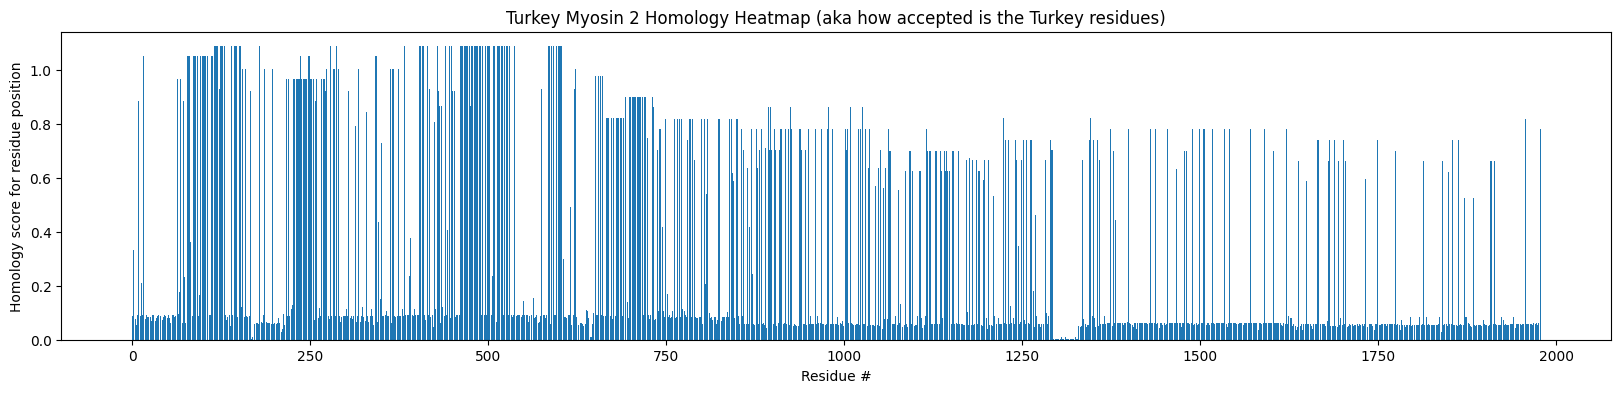

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4)) 
plt.bar(x=list(range(len(turkey_scores))), height=[score for score, char in turkey_scores])
plt.title("Turkey Myosin 2 Homology Heatmap (aka how accepted is the Turkey residues)")
plt.ylabel("Homology score for residue position")
plt.xlabel("Residue #")


In [82]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=list(range(len(turkey_scores))), y=[score for score, char in turkey_scores]))
fig.update_layout(
    title="Turkey Myosin 2 Homology Heatmap (aka how accepted is the Turkey residues)",
    xaxis_title="Residue #",
    yaxis_title="Homology score for residue position",
    autosize=False,
    width=2000,  # Adjust the width to your preference
    height=400   # Adjust the height to your preference
)

# Show the plot
fig.show()


In [92]:
range_of_interest_1 = turkey_scores[112:130] # Oops these are buried residues! 
print(''.join([tup[1] for tup in range_of_interest_1]))
range_of_interest_2 = turkey_scores[226:254]
print(''.join([tup[1] for tup in range_of_interest_2]))
range_of_interest_3 = turkey_scores[266:275]
print(''.join([tup[1] for tup in range_of_interest_3]))
range_of_interest_4 = turkey_scores[462:471]
print(''.join([tup[1] for tup in range_of_interest_4]))
range_of_interest_5 = turkey_scores[476:505]
print(''.join([tup[1] for tup in range_of_interest_5]))
range_of_interest_6 = turkey_scores[583:607]
print(''.join([tup[1] for tup in range_of_interest_6]))
range_of_interest_7 = turkey_scores[698:725]
print(''.join([tup[1] for tup in range_of_interest_7]))

IYTYSGLFCVVVNPYKQL
ANPILEAFGNAKTVKNDNSSRFGKFIRI
IETYLLEKS
ILDIAGFEI
FEQLCINYTNEKLQQLFNHTMFILEQEEY
LHYAGKVSYNASAWLTKNMDPLND
HLVLEQLRCNGVLEGIRICRQGFPNRI


sublime lookup for hydrophobic: A|I|L|M|F|W|Y|V
sublime lookup for charged: R|H|K|D|E

select range_of_interest_1, chain A and resi 112-130


In [86]:
turkey_scores[1447:1450]

[(0.05298103436010162, 'L'),
 (0.7019859031742361, 'V'),
 (0.061042252449933596, 'S')]

In [10]:
import pymol
from pymol import cmd, stored

# Initialize PyMOL
pymol.finish_launching()

# Load your structure
cmd.fetch("6XE9")  # replace with your file or use fetch for PDB ID

# Function to convert a float value to a color on the white to red spectrum
def value_to_color(value):
    return [value, 1.0 - value, 1.0 - value]  # Red intensity increases with value

for i, value in enumerate(turkey_scores, start=1):
    color_name = f"color_{i}"
    cmd.set_color(color_name, value_to_color(value))
    cmd.color(color_name, f"resi {i}")

# Save the session if needed
cmd.save("colored_structure.pse")
cmd.ipython_image()


ModuleNotFoundError: No module named 'pymol'

In [ ]:
from Bio.PDB import PDBList

pdbl = PDBList()
pdbl.retrieve_pdb_file('6XE9', file_format='pdb', pdir='.')


'./pdb6xe9.ent'

Can we use STRIDE for buried residues? https://webclu.bio.wzw.tum.de/cgi-bin/stride/stridecgi.py

In [ ]:
import requests
from bs4 import BeautifulSoup

url = f"https://www.rcsb.org/sequence/{PDB_ID}"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [ ]:
soup

<!DOCTYPE html>
<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674165"></script><script src="/js/search/react-search.js?ts=5674165"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new 

In [ ]:
svg_element = soup.find('rect', id="annotationTrack_HYDROPATHY_RcsbFvBoard_lq0353vh_pane")
svg_element


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Set up the Selenium WebDriver
driver = webdriver.Chrome()  # Replace with your browser's driver

# Open the URL
driver.get("https://www.rcsb.org/sequence/6XE9")

# Let's wait for the page to load the content (you can adjust the time as needed)
driver.implicitly_wait(100)

# Get the HTML content after JavaScript execution
html_content = driver.page_source

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the SVG element
svg_element = soup.find('rect', id="annotationTrack_HYDROPATHY_RcsbFvBoard_lq0353vh_pane")

# Close the WebDriver
driver.quit()

# print(svg_element)
soup


<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674171"></script><script src="/js/search/react-search.js?ts=5674171"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new Date).getTime()}

In [ ]:
soup

<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674166"></script><script src="/js/search/react-search.js?ts=5674166"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new Date).getTime()}